<a href="https://colab.research.google.com/github/nssn96/Diabetes-Classifier/blob/main/DiabetesClassifier_recentVersion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

We will use Naive Bayes to model the "Diabetes" data set. This model will predict which people are likely to develop diabetes.

## Import Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline 

import seaborn as sns


## Load and review data

In [ ]:
dataset = pd.read_csv("diabetes.csv")

In [ ]:
 # Check number of columns and rows in data frame
dataset.shape

(2000, 9)

CURSE OF DIMENSIONALITY : 
Machine learning excels at analyzing data with many dimensions, but it becomes more challenging to create meaningful models as the number of dimensions increase.

CURSE OF DIMENSIONALITY will affect the performance of the model because the number of rows is way higher than the number of columns

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


From the above we can see that the outcome is a integer type. Since we take 0 indicates non-Diabetic and 1 indicates Diabetic, it must be a categorical data. So, we need to change the data type to object.

In [ ]:
# cat=["Outcome"]
# for i in cat:
#     dataset[i]=dataset[i].astype("object")

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               2000 non-null   int64  
 1   Glucose                   2000 non-null   int64  
 2   BloodPressure             2000 non-null   int64  
 3   SkinThickness             2000 non-null   int64  
 4   Insulin                   2000 non-null   int64  
 5   BMI                       2000 non-null   float64
 6   DiabetesPedigreeFunction  2000 non-null   float64
 7   Age                       2000 non-null   int64  
 8   Outcome                   2000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 140.8 KB


We have successfuly changed the Outcome datatype to object

In [ ]:
# To check first 5 rows of data set
dataset.head() 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,2,138,62,35,0,33.6,0.127,47,1
1,0,84,82,31,125,38.2,0.233,23,0
2,0,145,0,0,0,44.2,0.630,31,1
3,0,135,68,42,250,42.3,0.365,24,1
4,1,139,62,41,480,40.7,0.536,21,0


From the above we can see that all the features are numerical variable except the outcome which is the dependent variable. The 1 outcome means the patient is diabetic and the 0 means the patient is non-diabetic.

In [ ]:
# If there are any null values in data set
#dataset.isnull().values.any() 
dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

From the above output we can see that there are no missing values in the dataset.We can consider the values zero in features as missing values and should be imputed before applying it to the classifier.Because Naive Bayes classifier is susceptible to missing values.

# Exploratory Data Analysis

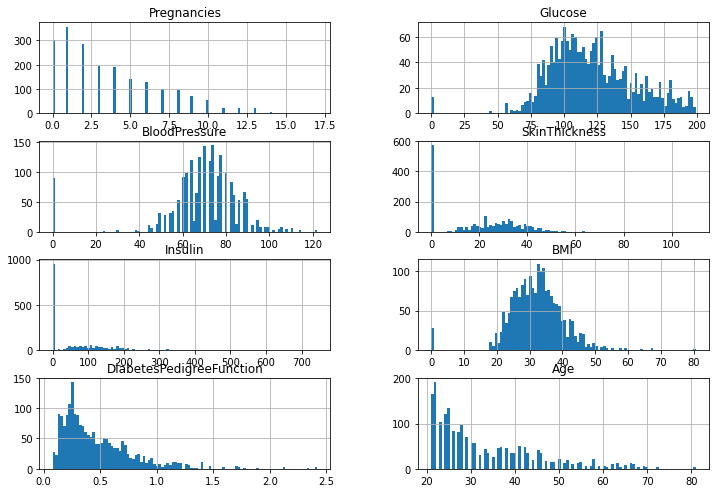

In [ ]:
# Histogram of first 8 columns
columns = list(dataset)[0:-1] # Excluding Outcome column which has only 
dataset[columns].hist(stacked=False, bins=100, figsize=(12,30), layout=(14,2)); 


The following can be inferred from the above histogram

*   Number of pregnancies is a discrete variable and it is left skewed.
*   Glucose ,Blood pressure and BMI features are continuous variables and are normally distributed, so it will work well with naive bayes algorithm.


*   Diabets Pedigree function feature is left skewed.
*   Age feature is left skewed and is more of a discrete variable








## To identify Correlation in data 

This step is done inorder to identify dependency or correlation between the independent features. Naive Bayes classifier assumes that the predictor variables are mutually independent of each other ie there should no or less correlation between the independent variables.

In [ ]:
dataset.corr() # It will show correlation matrix 

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.120405,0.149672,-0.063375,-0.076600,0.019475,-0.025453,0.539457,0.224437
Glucose,0.120405,1.000000,0.138044,0.062368,0.320371,0.226864,0.123243,0.254496,0.458421
BloodPressure,0.149672,0.138044,1.000000,0.198800,0.087384,0.281545,0.051331,0.238375,0.075958
SkinThickness,-0.063375,0.062368,0.198800,1.000000,0.448859,0.393760,0.178299,-0.111034,0.076040
Insulin,-0.076600,0.320371,0.087384,0.448859,1.000000,0.223012,0.192719,-0.085879,0.120924
BMI,0.019475,0.226864,0.281545,0.393760,0.223012,1.000000,0.125719,0.038987,0.276726
DiabetesPedigreeFunction,-0.025453,0.123243,0.051331,0.178299,0.192719,0.125719,1.000000,0.026569,0.155459
Age,0.539457,0.254496,0.238375,-0.111034,-0.085879,0.038987,0.026569,1.000000,0.236509
Outcome,0.224437,0.458421,0.075958,0.076040,0.120924,0.276726,0.155459,0.236509,1.000000


However we want to see correlation in graphical representation so we can use Heatmap function for detecting the correlation

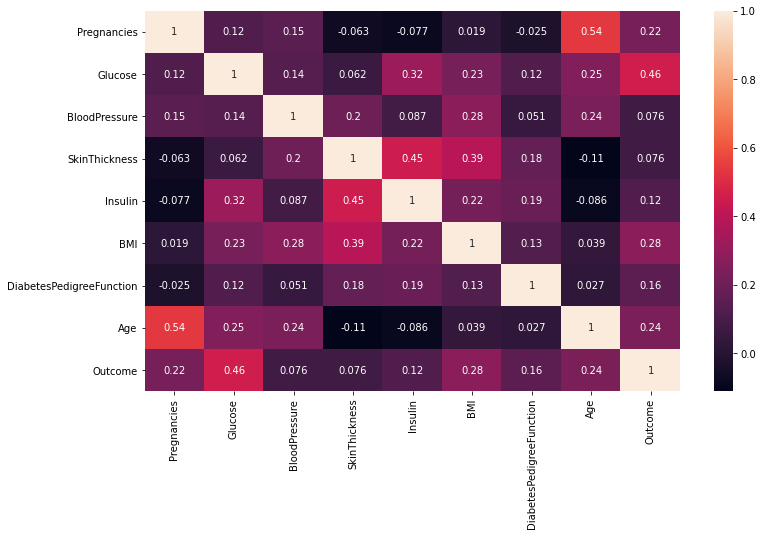

In [ ]:
#Heat Map
plt.figure(figsize=(12,7))
sns.heatmap(dataset.corr(), annot=True)

From the above we can see that most of the features are not correlated but **Insulin and skin thickness**,**Age and Pregnancies** have high positive correlation.

Pairplot - to detect  the correlation between independent variable using graphs or plots

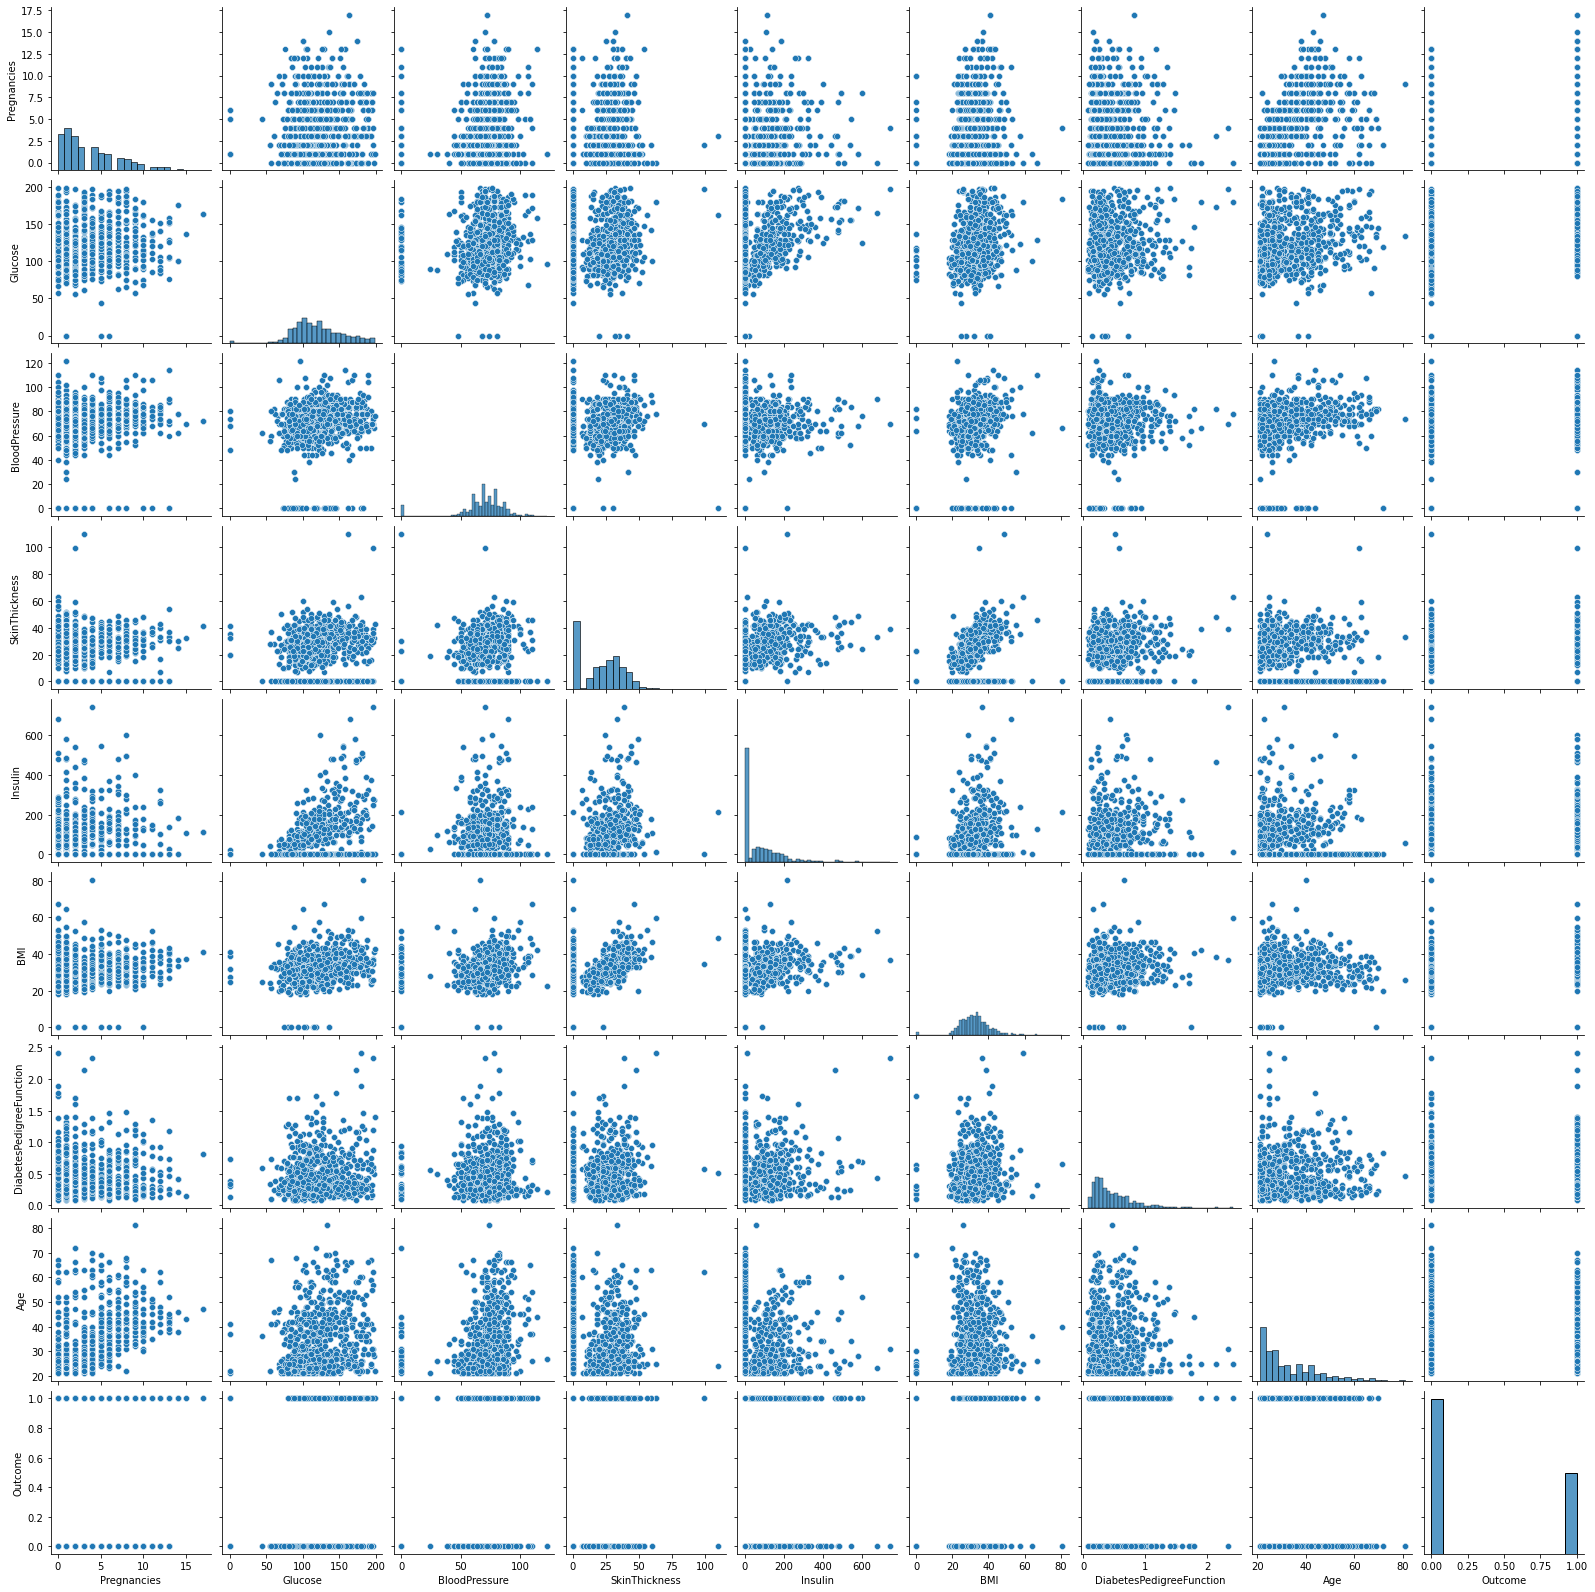

In [ ]:
#sns.pairplot(dataset,diag_kind='kde')
sns.pairplot(dataset)

From the above graph we can conform that Insulin and skin thickness, Age and Pregnancies have high positive correlation or highly correlated.
The Problem of correlation between independent variables can be overcomed by feature Engineering.

# Checking for outliers

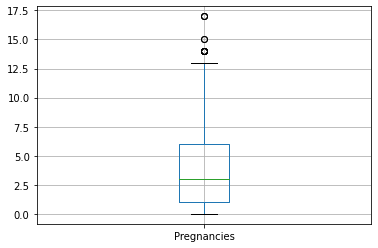

In [ ]:
dataset.boxplot(column=['Pregnancies'])
plt.show()

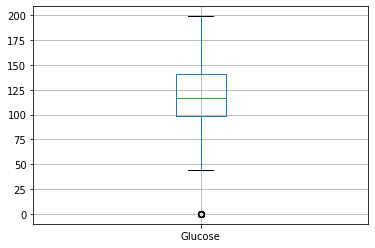

In [ ]:
dataset.boxplot(column=['Glucose'])
plt.show()

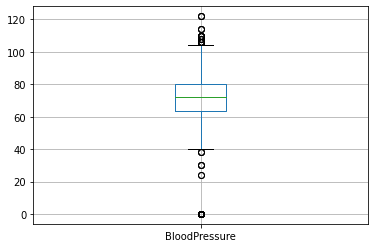

In [ ]:
dataset.boxplot(column=['BloodPressure'])
plt.show()

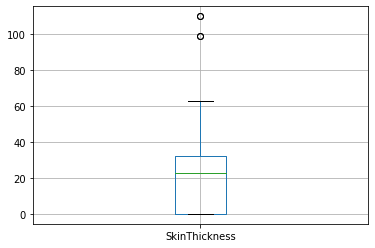

In [ ]:
dataset.boxplot(column=['SkinThickness'])
plt.show()

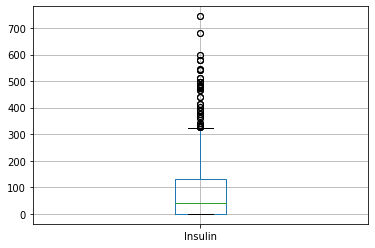

In [ ]:
dataset.boxplot(column=['Insulin'])
plt.show()

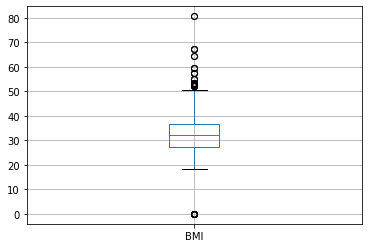

In [ ]:
dataset.boxplot(column=['BMI'])
plt.show()

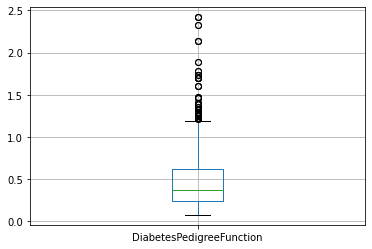

In [ ]:
dataset.boxplot(column=['DiabetesPedigreeFunction'])
plt.show()

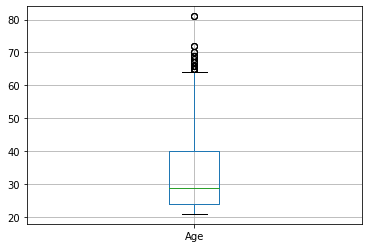

In [ ]:
dataset.boxplot(column=['Age'])
plt.show()

From the above box-plotes we can see that all the features have outliers in them and

Outlier removal

In [ ]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [ ]:
lower,upper=remove_outlier(dataset['Pregnancies'])
dataset['Pregnancies']=np.where(dataset['Pregnancies']>upper,upper,dataset['Pregnancies'])
dataset['Pregnancies']=np.where(dataset['Pregnancies']<lower,lower,dataset['Pregnancies'])

lower,upper=remove_outlier(dataset['Glucose'])
dataset['Glucose']=np.where(dataset['Glucose']>upper,upper,dataset['Glucose'])
dataset['Glucose']=np.where(dataset['Glucose']<lower,lower,dataset['Glucose'])

lower,upper=remove_outlier(dataset['BloodPressure'])
dataset['BloodPressure']=np.where(dataset['BloodPressure']>upper,upper,dataset['BloodPressure'])
dataset['BloodPressure']=np.where(dataset['BloodPressure']<lower,lower,dataset['BloodPressure'])

lower,upper=remove_outlier(dataset['SkinThickness'])
dataset['SkinThickness']=np.where(dataset['SkinThickness']>upper,upper,dataset['SkinThickness'])
dataset['SkinThickness']=np.where(dataset['SkinThickness']<lower,lower,dataset['SkinThickness'])

lower,upper=remove_outlier(dataset['Insulin'])
dataset['Insulin']=np.where(dataset['Insulin']>upper,upper,dataset['Insulin'])
dataset['Insulin']=np.where(dataset['Insulin']<lower,lower,dataset['Insulin'])

lower,upper=remove_outlier(dataset['BMI'])
dataset['BMI']=np.where(dataset['BMI']>upper,upper,dataset['BMI'])
dataset['BMI']=np.where(dataset['BMI']<lower,lower,dataset['BMI'])

lower,upper=remove_outlier(dataset['DiabetesPedigreeFunction'])
dataset['DiabetesPedigreeFunction']=np.where(dataset['DiabetesPedigreeFunction']>upper,upper,dataset['DiabetesPedigreeFunction'])
dataset['DiabetesPedigreeFunction']=np.where(dataset['DiabetesPedigreeFunction']<lower,lower,dataset['DiabetesPedigreeFunction'])

lower,upper=remove_outlier(dataset['Age'])
dataset['Age']=np.where(dataset['Age']>upper,upper,dataset['Age'])
dataset['Age']=np.where(dataset['Age']<lower,lower,dataset['Age'])

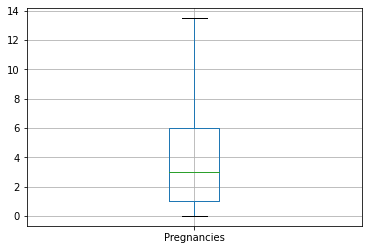

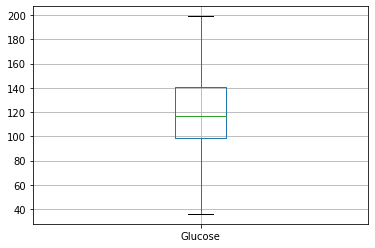

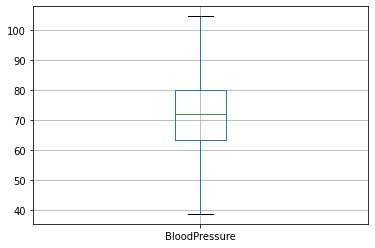

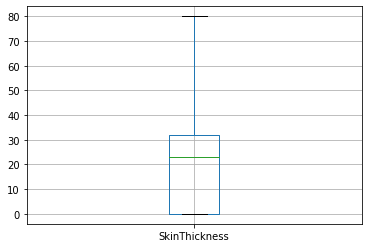

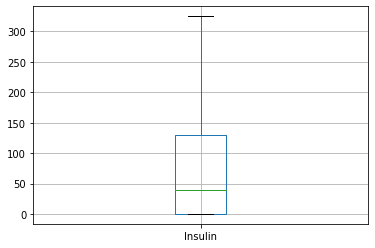

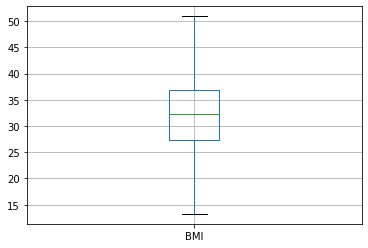

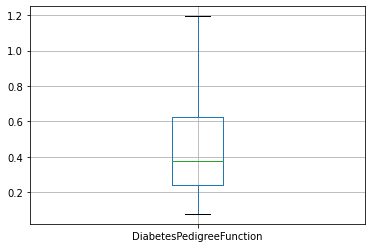

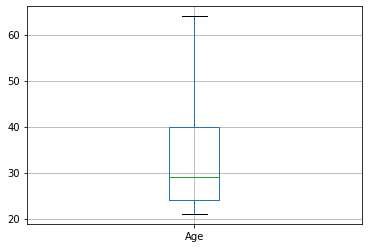

In [ ]:
#Checking again for the outliers

dataset.boxplot(column=['Pregnancies'])
plt.show()

dataset.boxplot(column=['Glucose'])
plt.show()

dataset.boxplot(column=['BloodPressure'])
plt.show()

dataset.boxplot(column=['SkinThickness'])
plt.show()

dataset.boxplot(column=['Insulin'])
plt.show()

dataset.boxplot(column=['BMI'])
plt.show()

dataset.boxplot(column=['DiabetesPedigreeFunction'])
plt.show()

dataset.boxplot(column=['Age'])
plt.show()

Data Preparation
Check hidden missing values
As we checked missing values earlier but haven't got any. But there can be lots of entries with 0 values. We must need to take care of those as well.

In [ ]:
dataset.isin([0]).sum()

Pregnancies                  301
Glucose                        0
BloodPressure                  0
SkinThickness                573
Insulin                      956
BMI                            0
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1316
dtype: int64

From the above output we can see that there are zero values in number of Pregnancies, SkinThickness and Insulin. But, logically the number of pregnancies can be zero whereas the skinthickness and insulin cannot have the value zero and therefore needs to be imputed with median value.

In [ ]:
impute_median=dataset['SkinThickness'].median()
#dataset['SkinThickness']=dataset['SkinThickness'].fillna(impute_median)
dataset['SkinThickness']=dataset['SkinThickness'].mask(dataset['SkinThickness']==0).fillna(impute_median)

impute_median=dataset['Insulin'].median()
dataset['Insulin']=dataset['Insulin'].mask(dataset['Insulin']==0).fillna(impute_median)

In [ ]:
dataset.isin([0]).sum()

Pregnancies                  301
Glucose                        0
BloodPressure                  0
SkinThickness                  0
Insulin                        0
BMI                            0
DiabetesPedigreeFunction       0
Age                            0
Outcome                     1316
dtype: int64

## Calculate diabetes ratio of True/False from outcome variable 

In [ ]:
n_true = len(dataset.loc[dataset['Outcome'] == True])
n_false = len(dataset.loc[dataset['Outcome'] == False])
print("Number of true cases: {0} ({1:2.2f}%)".format(n_true, (n_true / (n_true + n_false)) * 100 ))
print("Number of false cases: {0} ({1:2.2f}%)".format(n_false, (n_false / (n_true + n_false)) * 100))

Number of true cases: 684 (34.20%)
Number of false cases: 1316 (65.80%)


So we have 34.20% people in current data set who have diabetes and rest of 65.80% doesn't have diabetes. 

There is a slight data imbalance in the dataset which can be overcomed by SMOTE technique

## Spliting the dataset 
I will use 70% of data for training and 30% for testing.

In [ ]:
from sklearn.model_selection import train_test_split

X = dataset.drop('Outcome',axis=1)     # Predictor feature columns (8 X m)

Y = dataset['Outcome']   # Predicted class (1=True, 0=False) (1 X m)

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)
# 1 is just any random seed number

x_train.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
1194,8.0,65.0,72.0,23.0,40.0,32.0,0.600,42.0
45,0.0,180.0,66.0,39.0,40.0,42.0,1.194,25.0
1477,1.0,83.0,68.0,23.0,40.0,18.2,0.624,27.0
1293,2.0,125.0,60.0,20.0,140.0,33.8,0.088,31.0
1736,11.0,136.0,84.0,35.0,130.0,28.3,0.260,42.0


Lets check split of data

In [ ]:
print("{0:0.2f}% data is in training set".format((len(x_train)/len(dataset.index)) * 100))
print("{0:0.2f}% data is in test set".format((len(x_test)/len(dataset.index)) * 100))

70.00% data is in training set
30.00% data is in test set


Now lets check diabetes True/False ratio in split data 

In [ ]:
print("Original Diabetes True Values    : {0} ({1:0.2f}%)".format(len(dataset.loc[dataset['Outcome'] == 1]), (len(dataset.loc[dataset['Outcome'] == 1])/len(dataset.index)) * 100))
print("Original Diabetes False Values   : {0} ({1:0.2f}%)".format(len(dataset.loc[dataset['Outcome'] == 0]), (len(dataset.loc[dataset['Outcome'] == 0])/len(dataset.index)) * 100))
print("")
print("Training Diabetes True Values    : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 1]), (len(y_train[y_train[:] == 1])/len(y_train)) * 100))
print("Training Diabetes False Values   : {0} ({1:0.2f}%)".format(len(y_train[y_train[:] == 0]), (len(y_train[y_train[:] == 0])/len(y_train)) * 100))
print("")
print("Test Diabetes True Values        : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 1]), (len(y_test[y_test[:] == 1])/len(y_test)) * 100))
print("Test Diabetes False Values       : {0} ({1:0.2f}%)".format(len(y_test[y_test[:] == 0]), (len(y_test[y_test[:] == 0])/len(y_test)) * 100))
print("")

Original Diabetes True Values    : 684 (34.20%)
Original Diabetes False Values   : 1316 (65.80%)

Training Diabetes True Values    : 488 (34.86%)
Training Diabetes False Values   : 912 (65.14%)

Test Diabetes True Values        : 196 (32.67%)
Test Diabetes False Values       : 404 (67.33%)



# Train Naive Bayes algorithm 

In [ ]:
from sklearn.naive_bayes import GaussianNB # using Gaussian algorithm from Naive Bayes

#creatw the model
diab_model = GaussianNB()
diab_model.fit(x_train, y_train.ravel())


# NB_model = GaussianNB()
# NB_model.fit(x_train, y_train)

GaussianNB(priors=None, var_smoothing=1e-09)

### Lets check the confusion matrix and classification report 

In [ ]:
## Performance Matrix on train data set
y_train_predict = diab_model.predict(x_train)
model_score = diab_model.score(x_train, y_train)
#print("Model Accuracy: {} percent",model_score*100)
print("Model Accuracy : {0:0.2f}% ".format(model_score * 100))
print(metrics.confusion_matrix(y_train, y_train_predict))
print(metrics.classification_report(y_train, y_train_predict))

Model Accuracy : 76.07% 
[[754 158]
 [177 311]]
              precision    recall  f1-score   support

           0       0.81      0.83      0.82       912
           1       0.66      0.64      0.65       488

    accuracy                           0.76      1400
   macro avg       0.74      0.73      0.73      1400
weighted avg       0.76      0.76      0.76      1400



So, the total number of correct predictions done by the model = 754+311 = 1065

So, the total number of incorrect predictions done by the model = 158+177 = 335

Since the number of correct predictions is higher than the incorrect predictions the model works well in the training data

In [ ]:
## Performance Matrix on test data set
y_test_predict = diab_model.predict(x_test)
model_score = diab_model.score(x_test, y_test)
print("Model Accuracy : {0:0.2f}% ".format(model_score * 100))
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Model Accuracy : 76.00% 
[[324  80]
 [ 64 132]]
              precision    recall  f1-score   support

           0       0.84      0.80      0.82       404
           1       0.62      0.67      0.65       196

    accuracy                           0.76       600
   macro avg       0.73      0.74      0.73       600
weighted avg       0.77      0.76      0.76       600



So, the total number of correct predictions done by the model = 324+132 = 456

So, the total number of incorrect predictions done by the model = 80+64 = 144

Since the number of correct predictions is higher than the incorrect predictions the model works well in the test data

From the above output from the performance of the model from training and testing dataset, we can say that the model has no overfitting or underfitting.

# EXPERIMENT SECTION

Earlier we saw that there was a slight data imbalance in the dataset which might affect the accuract of the model. This can be overcomed by SMOTE technique.

SMOTE--> Synthetic Minority Oversampling (SMOTE) works by creating synthetic observations based upon the existing minority observations

In [ ]:
!pip install imblearn 

In [ ]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_resampled, y_resampled = oversample.fit_resample(X, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
X_resampled.shape

(2632, 8)

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

diab_model = GaussianNB()
diab_model.fit(X_resampled, y_resampled)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
## Performance Matrix on train data set with SMOTE
y_train_predict = diab_model.predict(X_resampled)
model_score = diab_model.score(X_resampled, y_resampled)
print("Model Accuracy : {0:0.2f}% ".format(model_score * 100))
print(metrics.confusion_matrix(y_resampled, y_train_predict))
print(metrics.classification_report(y_resampled ,y_train_predict))

Model Accuracy : 73.14% 
[[1011  305]
 [ 402  914]]
              precision    recall  f1-score   support

           0       0.72      0.77      0.74      1316
           1       0.75      0.69      0.72      1316

    accuracy                           0.73      2632
   macro avg       0.73      0.73      0.73      2632
weighted avg       0.73      0.73      0.73      2632



In [ ]:
## Performance Matrix on test data set
y_test_predict = diab_model.predict(x_test)
model_score = diab_model.score(x_test, y_test)
print("Model Accuracy : {0:0.2f}% ".format(model_score * 100))
print(metrics.confusion_matrix(y_test, y_test_predict))
print(metrics.classification_report(y_test, y_test_predict))

Model Accuracy : 75.17% 
[[307  97]
 [ 52 144]]
              precision    recall  f1-score   support

           0       0.86      0.76      0.80       404
           1       0.60      0.73      0.66       196

    accuracy                           0.75       600
   macro avg       0.73      0.75      0.73       600
weighted avg       0.77      0.75      0.76       600

